## Names of all group members: ##
### Giulio Vittorio Carassai, Alihan Kerestecioğlu, Sören Lambrecht

In [1]:
# Exercise 1.
import numpy as np
np.random.seed(0)  # for reproducibility

# simulate x variables
m = 20000
n = 10000

def create_sample_x(m,n):
    # age vector
    x1 = np.random.uniform(low=18., high=80., size=[m+n, 1])
    # income vector
    x2 = np.random.uniform(low=1., high=15., size=[m+n, 1])
    # salaried/self-employed vector
    x3 = np.random.binomial(1,0.1,size=[m+n, 1])

    return np.concatenate((x1,x2,x3),axis=1)

X = create_sample_x(m,n)

# a) calculate empirical means and standard deviations over training data

print("Exercise 1.a)")
print("AGE: empirical mean = ", np.mean(X[:m,0]), "  empirical std = ", np.std(X[:m,0]) )
print("INCOME: empirical mean = ", np.mean(X[:m,1]), "  empirical std = ", np.std(X[:m,1]) )
print("SALARIED/SELF-EMPLOYED: empirical mean = ", np.mean(X[:m,2]), "  empirical std = ", np.std(X[:m,2]) )



Exercise 1.a)
AGE: empirical mean =  48.74265389697123   empirical std =  18.0074382841933
INCOME: empirical mean =  7.986522193349889   empirical std =  4.030802860686146
SALARIED/SELF-EMPLOYED: empirical mean =  0.1017   empirical std =  0.30225338707779603


#### 1.b) Can you come up with a few (2 or 3) additional features that may be relevant? (you don't have to implement those of course, just write down your answer in text)


Some other relevant features may include:
1. loan amount
2. collateral (estimated) value
3. single/married

In [2]:
# Exercise 2.
# Building the datasets:

def sigmoid(data):
    data = data.astype(np.float128)
    return 1/(1 + np.exp(-data))

xi = np.random.uniform(size=m+n)

def p1(x):
    return sigmoid(13.3 - 0.33*x[:,0] + 3.5*x[:,1] -3*x[:,2])

def p2(x):
    return sigmoid(5 - 10*(np.where(x[:,0]<25, 1, 0) +
                           np.where(x[:,0]>75, 1, 0)) + 1.1*x[:,1] - x[:,2])

# build the first dataset

y1 = np.where(xi <= p1(X), 1, 0)

# build the second dataset

y2 = np.where(xi <= p2(X), 1, 0)



In [3]:
# Exercise 2. a)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# "model = LogisticRegression().fit(X_data, Y_data)" fits a model
# "pred_X = model.predict_proba(X)" evaluates the model
# (note that it outputs both P(Y=1|X) and P(Y=0|X))
# "log_loss(Y, pred_X)" evaluates the negative conditional log likelihood

# Fit the models on both datasets

model1 = LogisticRegression().fit(X[:m], y1[:m])
model2 = LogisticRegression().fit(X[:m], y2[:m])

# Calculate cross-entropy loss on both datasets for train and test

# dataset 1
pred1_log_train = model1.predict_proba(X[:m])[:,1]
pred1_log_test = model1.predict_proba(X[m:m+n])[:,1]

# dataset 2
pred2_log_train = model2.predict_proba(X[:m])[:,1]
pred2_log_test = model2.predict_proba(X[m:m+n])[:,1]

# TRAIN
print("Cross-entropy training loss for dataset 1:", log_loss(y1[:m], pred1_log_train),
      "\n Cross-entropy training loss for dataset 2:", log_loss(y2[:m], pred2_log_train))

print('-----------------------------------------')

# TEST
print(
     'Cross-entropy test loss for dataset 1: ', log_loss(y1[m:m+n], pred1_log_test),
     '\n Cross-entropy test loss for dataset 2: ', log_loss(y2[m:m+n], pred2_log_test))

Cross-entropy training loss for dataset 1: 0.02965487399827424 
 Cross-entropy training loss for dataset 2: 0.1535391609744277
-----------------------------------------
Cross-entropy test loss for dataset 1:  0.03486220334067468 
 Cross-entropy test loss for dataset 2:  0.14864439086899417


In [4]:
# Exercise 2. b)
# Calculate normalized data (normalize only with training std)

def normalize(x, m):
    # to not normalize in place
    x_copy = np.copy(x)
    # scale training
    x_copy[:m, 0] /= np.std(x_copy[:m, 0])
    x_copy[:m, 1] /= np.std(x_copy[:m, 1])
    x_copy[:m, 2] /= np.std(x_copy[:m, 2])
    # scale test 
    x_copy[m:, 0] /= np.std(x_copy[m:, 0])
    x_copy[m:, 1] /= np.std(x_copy[m:, 1])
    x_copy[m:, 2] /= np.std(x_copy[m:, 2])
    return x_copy


x_norm = normalize(X,m)

In [5]:
# Exercise 2.b) (i) and (ii)
from sklearn.svm import SVC
# "model = SVC(kernel='rbf', gamma=GAMMA, C=LAMBDA, probability=True)" creates
# a model with kernel exp(-GAMMA \|x-x'\|_2^2) and regul. parameter LAMBDA.
# "probability=True" enables the option "model.predict_proba(X)" to predict
# probabilities from features
# "model.fit(X, Y)" optimizes the model parameters (using hinge loss)

# Fit the models for both datasets (this can take up to 60 seconds with SVC)

g = 0.1
l = 0.2

model_SVC1 = SVC(kernel='rbf', gamma=g, C=l, probability=True).fit(x_norm[:m], y1[:m]) # linear kernel => hinge loss
model_SVC2 = SVC(kernel='rbf', gamma=g, C=l, probability=True).fit(x_norm[:m], y2[:m])

In [6]:
# Exercise 2.b (iii)
# "model.predict_proba(X)" predicts probabilities from features
# (note that it outputs both P(Y=1|X) and P(Y=0|X))

# Calculate cross-entropy loss on both datasets for train and test

pred_SVC1_train = model_SVC1.predict_proba(x_norm[:m])[:,1]
pred_SVC1_test = model_SVC1.predict_proba(x_norm[m:m+n])[:,1]

pred_SVC2_train = model_SVC2.predict_proba(x_norm[:m])[:,1]
pred_SVC2_test = model_SVC2.predict_proba(x_norm[m:m+n])[:,1]

print("Cross-entropy training loss for dataset 1:",log_loss(y1[:m], pred_SVC1_train) ,
      "\n Cross-entropy training loss for dataset 2:", log_loss(y2[:m], pred_SVC2_train))

print('-----------------------------------------')

print(
     'Cross-entropy test loss for dataset 1: ', log_loss(y1[m:m+n], pred_SVC1_test),
     '\n Cross-entropy test loss for dataset 2: ', log_loss(y2[m:m+n], pred_SVC2_test))

Cross-entropy training loss for dataset 1: 0.03190722918660568 
 Cross-entropy training loss for dataset 2: 0.0710834962155202
-----------------------------------------
Cross-entropy test loss for dataset 1:  0.03890388265088498 
 Cross-entropy test loss for dataset 2:  0.06653516212807922


In [7]:
# Exercise 2.c

import matplotlib.pyplot as plt
# To calculate the curves, it is fine to take 100 threshold values c, i.e.,
theta = np.linspace(0, 1, 100)
# To approximately calculate the AUC, it is fine to simply use Riemann sums.
# This means, if you have 100 (a_i, b_i) pairs for the curves, a_1 <= a_2 <= ...
# then you may simply use the sum
# sum_{i=1}^99 (b_i + b_{i+1})/2 * (a_{i+1}-a_i)
# as the approximation of the integral (or AUC)


# first data set & logistic regression:
# (the code should be reusable for all cases, only exchanging datasets and
#  predicted probabilities depending on the model)

# test data and predictions
y1_true = y1[m:m+n]
y2_true = y2[m:m+n]

# for the later comparision
y1_preds_log = pred1_log_test
y2_preds_log = pred2_log_test

y1_preds_rkhs = pred_SVC1_test
y2_preds_rkhs = pred_SVC2_test


# Calculate positives
def P(y_true, threshold):
    return sum(y_true == 1) #nr of P

# Calculate true positives for all threshold values
def TP(y_true, threshold, y_preds):
    y_preds_binary = (y_preds > threshold).astype(int)
    tp = sum((y_true == 1) & (y_preds_binary == 1))
    return tp

# Calculate false positives for all threshold values
def FP(y_true, threshold, y_preds):
    y_preds_binary = (y_preds > threshold).astype(int)
    fp = sum((y_true == 0) & (y_preds_binary == 1))
    return fp

# Calculate FDR 
def FDR(y_true, theta, y_preds):
    fdr = []
    #epsilon = 1e-10
    for threshold in theta:
        fp = FP(y_true, threshold, y_preds)
        tp = TP(y_true, threshold, y_preds)
        val = fp / (fp + tp) if (fp + tp)> 0 else 0 
        fdr.append(val)
    return fdr

#and TPR rate 
def TPR(y_true, theta, y_preds):
    tpr = []
    #epsilon = 1e-10
    for threshold in theta:
        tp = TP(y_true, threshold, y_preds)
        p = P(y_true, threshold)
        val = tp / p if p > 0 else 0
        tpr.append(val)
    return tpr

# (points on the FDR/TPR curve) and the AUC
def auc_riemann_sum(y, x):
    auc = 0
    for i in range(len(x) - 1):
        width = x[i + 1] - x[i]
        height = (y[i] + y[i + 1]) / 2
        auc += width * height
    return -auc # need to change sign because tpr order is decreasing


AUC for Logistic regression on dataset 1:  0.00035938343934936734
AUC for Logistic regression on dataset 2:  0.007945081813851815
AUC for RKHS regression on dataset 1:  0.0003334494917892827
AUC for RKHS regression on dataset 2:  0.0011114220211103846


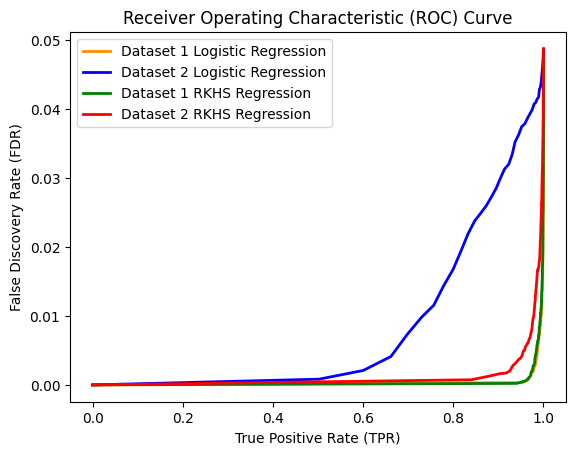

In [8]:
# Logistic regression curves
fdr_y1_log = FDR(y1_true, theta, y1_preds_log)
tpr_y1_log = TPR(y1_true, theta, y1_preds_log)
auc_y1_log = auc_riemann_sum(fdr_y1_log, tpr_y1_log)
print("AUC for Logistic regression on dataset 1: ",auc_y1_log)

fdr_y2_log = FDR(y2_true, theta, y2_preds_log)
tpr_y2_log = TPR(y2_true, theta, y2_preds_log)
auc_y2_log = auc_riemann_sum(fdr_y2_log, tpr_y2_log)
print("AUC for Logistic regression on dataset 2: ",auc_y2_log)

# RKHS regression curves
fdr_y1_rkhs = FDR(y1_true, theta, y1_preds_rkhs)
tpr_y1_rkhs = TPR(y1_true, theta, y1_preds_rkhs)
auc_y1_rkhs = auc_riemann_sum(fdr_y1_rkhs, tpr_y1_rkhs)
print("AUC for RKHS regression on dataset 1: ",auc_y1_rkhs)

fdr_y2_rkhs = FDR(y2_true, theta, y2_preds_rkhs)
tpr_y2_rkhs = TPR(y2_true, theta, y2_preds_rkhs)
auc_y2_rkhs = auc_riemann_sum(fdr_y2_rkhs, tpr_y2_rkhs)
print("AUC for RKHS regression on dataset 2: ",auc_y2_rkhs)

# Plot ROC curves
plt.figure()
plt.plot(tpr_y1_log, fdr_y1_log, color='darkorange', lw=2, label=f'Dataset 1 Logistic Regression')
plt.plot(tpr_y2_log, fdr_y2_log, color='blue', lw=2, label=f'Dataset 2 Logistic Regression')
plt.plot(tpr_y1_rkhs, fdr_y1_rkhs, color='green', lw=2, label=f'Dataset 1 RKHS Regression ')
plt.plot(tpr_y2_rkhs, fdr_y2_rkhs, color='red', lw=2, label=f'Dataset 2 RKHS Regression ')

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('True Positive Rate (TPR)')
plt.ylabel('False Discovery Rate (FDR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper left')
plt.show()


In [34]:
# Exercise 3.

# Set model parameters and define matrix D
I = 50_000 
xi_simul = np.random.uniform(0, 1, size= (n, I))

# Set values of p1 and p2 and check examine them as future results depend on them

D = (xi_simul <= p2(X)[m:].reshape(n, 1)).astype(int) #reshapes inplace and broadcasts matching size

loan = 1000
r_1 = 0.055
r_2 = 0.01

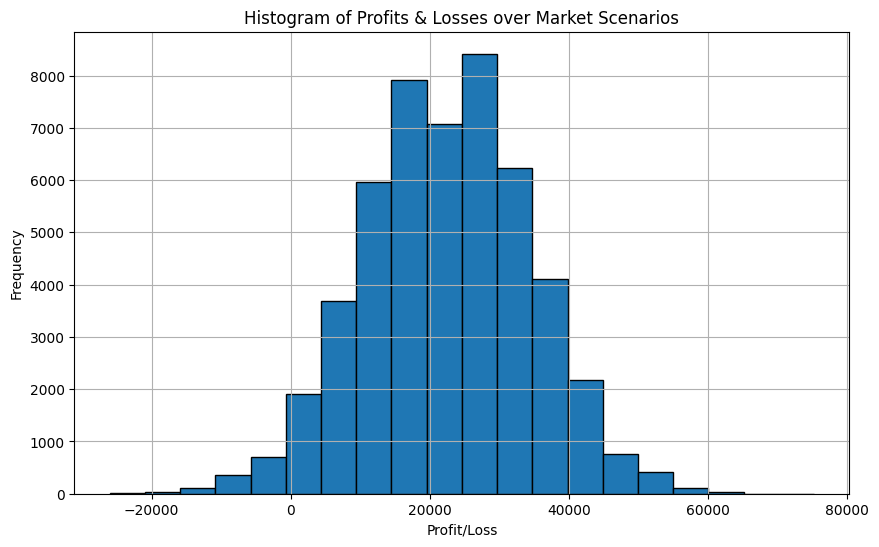

Expected Profit/Loss: 22377.7255
95%-VaR (Value at Risk): -2455.0


In [61]:
# Scenario 1:
# Define Portfolio and possible outcomes for this portfolio using matrix D

def prof_1(simulation):
    repayed_loans = np.sum(simulation, axis=0)  # Sum along columns
    delinquent_loans = n - repayed_loans #n is test size
    # print(delinquent_loans.shape)
    prof = repayed_loans * loan * r_1 - delinquent_loans * loan #intrest earned - default loans
    return prof

profits1 = prof_1(D)

# Plot histogram of profits and losses
plt.figure(figsize=(10, 6))
plt.hist(profits1, bins=20, edgecolor='black')
plt.xlabel('Profit/Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Profits & Losses over Market Scenarios')
plt.grid(True)
plt.show()

# Estimate expected profit and loss
expected_profit_loss = np.mean(profits1)
print('Expected Profit/Loss:', expected_profit_loss)

# Estimate 95%-VaR (5%-quantile) of the profit and loss distribution
var_95_1 = -np.percentile(profits1, 5) 
print('95%-VaR (Value at Risk):', var_95_1)

# Calculate expected profit and losses and 95%-VaR




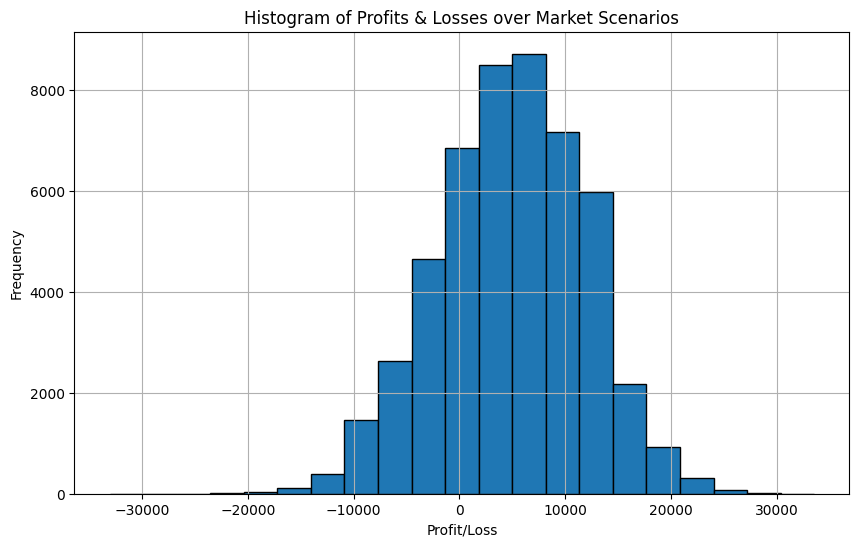

Expected Profit/Loss: 4813.6224
95%-VaR (Value at Risk): 6840.0


In [63]:
# Scenario 2:
# Define Portfolio and possible outcomes using the matrix D and the predicted
# default probabilities from the logistic regression model

def prof_2(simulation, predictions, threshold):
    ind = np.where(predictions >= threshold)
    rel_sim = simulation[ind] # filter the relevant ones
    repayed_loans = np.sum(rel_sim, axis=0)
    n = len(ind[0]) # no longer considering all outcomes
    delinquent_loans = n - repayed_loans
    # print(delinquent_loans.shape)
    prof = repayed_loans * loan * r_2 - delinquent_loans * loan
    return prof

# Plot histogram of profits and losses


# Calculate expected profit and losses and 95%-VaR

profits = prof_2(D, pred2_log_test, 0.95) 

# Plot histogram of profits and losses
plt.figure(figsize=(10, 6))
plt.hist(profits, bins=21, edgecolor='black')
plt.xlabel('Profit/Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Profits & Losses over Market Scenarios')
plt.grid(True)
plt.show()

# Estimate expected profit and loss
expected_profit_loss = np.mean(profits)
print('Expected Profit/Loss:', expected_profit_loss)

# Estimate 95%-VaR (5%-quantile) of the profit and loss distribution
var_95 = -np.percentile(profits, 5)
print('95%-VaR (Value at Risk):', var_95)

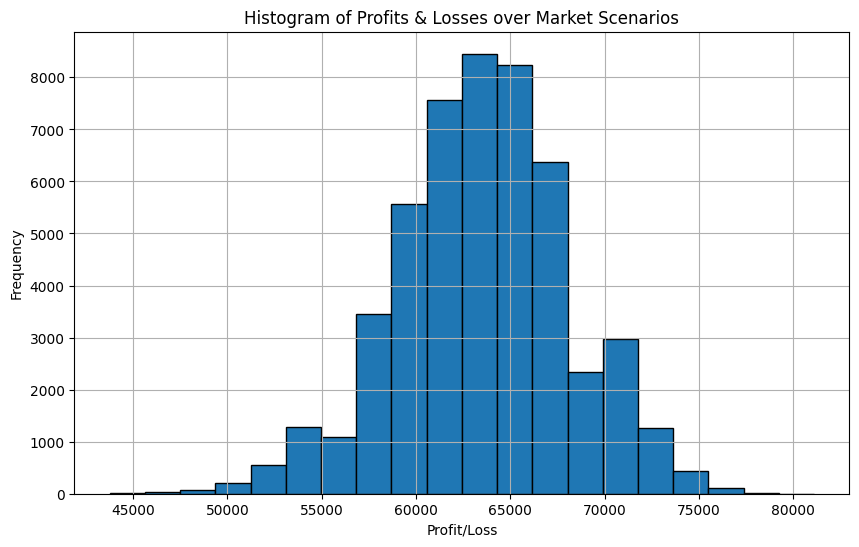

Expected Profit/Loss: 63545.9798
95%-VaR (Value at Risk): -55870.0


In [52]:
# Scenario 3:
# Define Portfolio and possible outcomes using the matrix D and the predicted
# default probabilities from the rkhs model


profits = prof_2(D, pred_SVC2_test, 0.95) # threshhold 0.95

# Plot histogram of profits and losses
plt.figure(figsize=(10, 6))
plt.hist(profits, bins=20, edgecolor='black')
plt.xlabel('Profit/Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Profits & Losses over Market Scenarios')
plt.grid(True)
plt.show()

# Estimate expected profit and loss
expected_profit_loss = np.mean(profits)
print('Expected Profit/Loss:', expected_profit_loss)

# Estimate 95%-VaR (5%-quantile) of the profit and loss distribution
var_95 = -np.percentile(profits, 5)
print('95%-VaR (Value at Risk):', var_95)

# Calculate expected profit and losses and 95%-VaR